# Time-Series Forecasting of Retail Sales

## By Desmond Cheng

Data Sets obtained from: https://www.kaggle.com/manjeetsingh/retaildataset

## Table of Contents:

1. Importing Libraries and Datasets

2. Dataframes Merging

3. Data Cleaning

4. Data Aggregation, Exploratory Data Analysis, and Descriptive Statistics

5. Data Manipulation

6. Correlation Analysis

7. Sales Time-Series Forecasting Model

For our current analysis, we have data sets comprised of retail sales that is broken down by date, store, and department level along with store information and macroeconomic indicators. Let's analyze these data sets and see if we can find any trends, correlations to macroeconomic indicators, and try to build a model in order to forecast future sales.

## Importing Libraries and Datasets

In [1]:
import pandas as pd
import numpy as np
import os
import csv
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from numpy.polynomial.polynomial import polyfit
import warnings
import itertools

Uploading our CSV data sets into Pandas Dataframes.

In [2]:
stores = pd.read_csv('C:\\Users\\desmo\\AppData\\Local\\Programs\\Python\\Python38-32\\Data Sets\\Retail Data\\datasets_2296_3883_stores data-set.csv')

In [3]:
features = pd.read_csv('C:\\Users\\desmo\\AppData\\Local\\Programs\\Python\\Python38-32\\Data Sets\\Retail Data\\datasets_2296_3883_Features data set.csv', parse_dates=['Date'])

In [4]:
sales = pd.read_csv('C:\\Users\\desmo\\AppData\\Local\\Programs\\Python\\Python38-32\\Data Sets\\Retail Data\\sales data-set.csv', parse_dates=['Date'])

In [5]:
stores

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [6]:
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-12-02,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-05-03,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-05-07,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-12-07,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [7]:
sales

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-05-02,24924.50,False
1,1,1,2010-12-02,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-05-03,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-05-10,628.10,False
421567,45,98,2012-12-10,1061.02,False
421568,45,98,2012-10-19,760.01,False


# Dataframes Merging

In [8]:
new_df = pd.merge(features, sales,  how='left', left_on=['Store','Date'], right_on = ['Store','Date'])

In [9]:
new_df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Dept,Weekly_Sales,IsHoliday_y
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1.0,24924.50,False
1,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2.0,50605.27,False
2,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3.0,13740.12,False
3,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4.0,39954.04,False
4,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5.0,32229.38,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423320,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,NaN,NaN,NaN
423321,45,2013-05-07,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,NaN,NaN,NaN
423322,45,2013-12-07,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,NaN,NaN,NaN
423323,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,NaN,NaN,NaN


In [10]:
df = pd.merge(new_df, stores, how='left', left_on=['Store'], right_on=['Store'])

Finally, our final dataframe.

In [11]:
df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Dept,Weekly_Sales,IsHoliday_y,Type,Size
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1.0,24924.50,False,A,151315
1,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2.0,50605.27,False,A,151315
2,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3.0,13740.12,False,A,151315
3,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4.0,39954.04,False,A,151315
4,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5.0,32229.38,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423320,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,NaN,NaN,NaN,B,118221
423321,45,2013-05-07,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,NaN,NaN,NaN,B,118221
423322,45,2013-12-07,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,NaN,NaN,NaN,B,118221
423323,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,NaN,NaN,NaN,B,118221


# Data Cleaning

As we see by looking at the end of the dataframe, there are some data points without any sales data. Let's see how many along with the datatypes of each column.

In [12]:
info = pd.DataFrame(df.dtypes).T.rename(index = {0: 'Column Type'})
info = info.append(pd.DataFrame(df.isnull().sum()).T.rename(index = {0: 'null values (nb)'}))
info = info.append((pd.DataFrame(df.isnull().sum()/df.shape[0]*100).round(1)).T.rename(index = {0:'null values {%}'}))
info

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Dept,Weekly_Sales,IsHoliday_y,Type,Size
Column Type,int64,datetime64[ns],float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float64,object,object,int64
null values (nb),0,0,0,0,270892,310793,284667,286859,270138,585,585,0,1755,1755,1755,0,0
null values {%},0,0,0,0,64,73.4,67.2,67.8,63.8,0.1,0.1,0,0.4,0.4,0.4,0,0


1755 null values for sales which is relatively small for our population (0.4%). Let's just drop them as it looks like sales data isn't available past a certain date.

In [13]:
df.dropna(subset=['Weekly_Sales'], inplace = True)

I note that the Markdown columns are predominatly null values. Let's drop them as well along with the extraneous Holiday column.

In [14]:
df.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'IsHoliday_y'],inplace=True)

In [15]:
date = df['Date']
df['Date'] = pd.to_datetime(date, dayfirst = True)

Let's check to ensure the no missing sales data points and the Markdown and extraneous Holiday columns are dropped.

In [16]:
df.tail()

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_x,Dept,Weekly_Sales,Type,Size
423281,45,2012-10-26,58.85,3.882,192.308899,8.667,False,93.0,2487.80,B,118221
423282,45,2012-10-26,58.85,3.882,192.308899,8.667,False,94.0,5203.31,B,118221
423283,45,2012-10-26,58.85,3.882,192.308899,8.667,False,95.0,56017.47,B,118221
423284,45,2012-10-26,58.85,3.882,192.308899,8.667,False,97.0,6817.48,B,118221
423285,45,2012-10-26,58.85,3.882,192.308899,8.667,False,98.0,1076.80,B,118221


Looks good to me! Let's check if there are any null values remaining.

In [17]:
df.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
IsHoliday_x     0
Dept            0
Weekly_Sales    0
Type            0
Size            0
dtype: int64

None left. No need for further action.

# Data Aggregation, Exploratory Data Analysis, and Descriptive Statistics

Let's aggregate our data points together by sales date in order to analyze the sales through time.

In [18]:
grouped_date = df.groupby("Date").agg({"Temperature":"mean"
                                            ,"Fuel_Price":"mean"
                                            ,"IsHoliday_x":"mean"
                                            ,"CPI":"mean"
                                           ,"Unemployment":"mean",
                                       'Size': "sum",
                                       "Weekly_Sales":"sum"}).sort_index()

grouped_date['Weekly_Sales'] = grouped_date['Weekly_Sales'].apply(int)

In [19]:
grouped_date

,Temperature,Fuel_Price,IsHoliday_x,CPI,Unemployment,Size,Weekly_Sales
Date,,,,,,,
2010-01-10,69.386998,2.733064,False,168.004935,8.433960,401124362,42239875
2010-02-04,52.587887,2.825453,False,167.377836,8.441092,404949417,50423831
2010-02-07,76.555955,2.793190,False,167.663264,8.373801,400777778,48917484
2010-02-19,37.038310,2.673666,False,167.338966,8.576351,408678503,48276993
2010-02-26,38.629563,2.685642,False,167.691019,8.561375,405309063,43968571
...,...,...,...,...,...,...,...
2012-10-08,81.164112,3.633858,False,175.378772,7.224676,403290230,47403451
2012-10-19,60.152756,3.878413,False,176.295499,6.948928,400883123,45122410
2012-10-26,60.530277,3.791086,False,176.182886,6.943212,402759569,45544116


In [20]:
grouped_date.describe()

,Temperature,Fuel_Price,CPI,Unemployment,Size,Weekly_Sales
count,143.000000,143.000000,143.000000,143.000000,1.430000e+02,1.430000e+02
mean,60.141472,3.359418,171.186095,7.962458,4.030796e+08,4.711342e+07
std,15.243981,0.429803,3.080271,0.470361,2.959961e+06,5.444206e+06
min,29.807584,2.673666,167.065968,6.942141,3.968156e+08,3.959985e+07
25%,47.176068,2.884495,168.004929,7.484837,4.009437e+08,4.488059e+07
50%,60.530277,3.490246,171.018134,8.096383,4.031158e+08,4.624390e+07
75%,74.208439,3.729174,174.316614,8.388105,4.047454e+08,4.779202e+07
max,81.886773,3.997432,176.295499,8.580858,4.130720e+08,8.093142e+07


Analyzing the statistics given by the describe function, we can see Weekly Sales doesn't fluctuate much with the median being ~46M and the mean and standard deviation being ~47M and ~5.4M respectively. The mean and median are extremely close to each other showing symmetrical distribution. The low standard deviation shows most of the data points hover around the mean and only fluctuates ~5.4M. However, the max is ~81M showing while most weeks are relatively stable, it does have large jumps. Lets visualize the Weekly Sales in the form of a box plot.

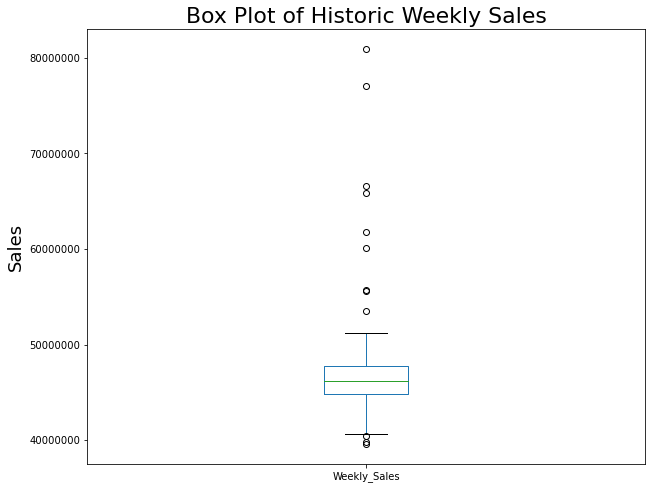

In [21]:
fig, ax = plt.subplots(figsize=(10,8))
grouped_date['Weekly_Sales'].plot.box()
plt.ylabel('Sales', size = 18)
plt.title('Box Plot of Historic Weekly Sales', size = 22)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

We confirm our observations from earlier. We can see that there are a few outliers that are significantly greater than upper quartile of the dataset. Let's plot a histogram to see the distribution.

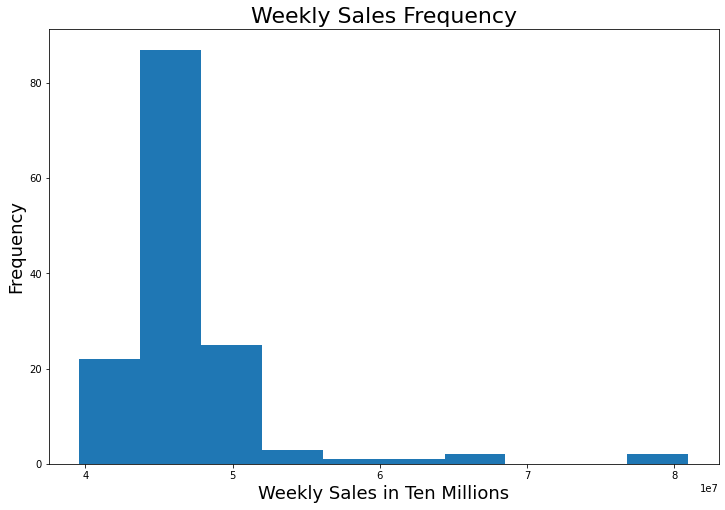

In [22]:
fig, ax = plt.subplots(figsize=(12,8))
grouped_date['Weekly_Sales'].plot(kind='hist', ax=ax)
plt.xlabel('Weekly Sales in Ten Millions', size = 18)
plt.ylabel('Frequency', size = 18)
plt.title('Weekly Sales Frequency', size = 22)
plt.show()

Looking at the histogram, we can see how most of the dates (~85) are around the ~46M sales range like we previously mentioned and only a few dates (2) that are around ~80M.

Let's plot a line graph so we can see how the sales flows through time company wide.

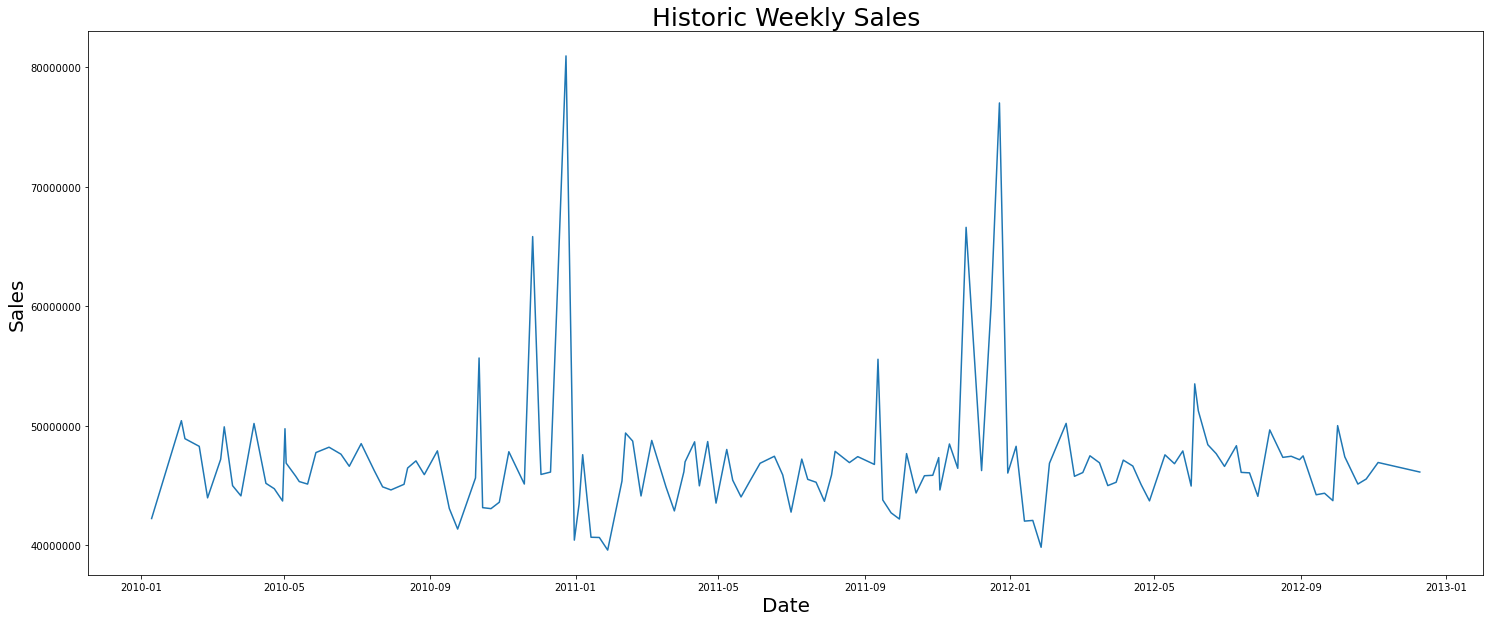

In [23]:
plt.figure(figsize=(25,10))
plt.plot(grouped_date.index, grouped_date.Weekly_Sales)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.xlabel('Date', size = 20)
plt.ylabel('Sales', size = 20)
plt.title('Historic Weekly Sales', size = 25)
plt.show()

Ah that helps us make sense of the data now! We can clearly see that the huge fluctuations of around 60% in sales occur during close to Christmas! This business is very seasonally which would be typical for a retail store. Year over year though, sales are flat.

Let's plot the other indicators as well and see if we see any patterns.

<AxesSubplot:title={'center':'Unemployment'}, xlabel='Date'>

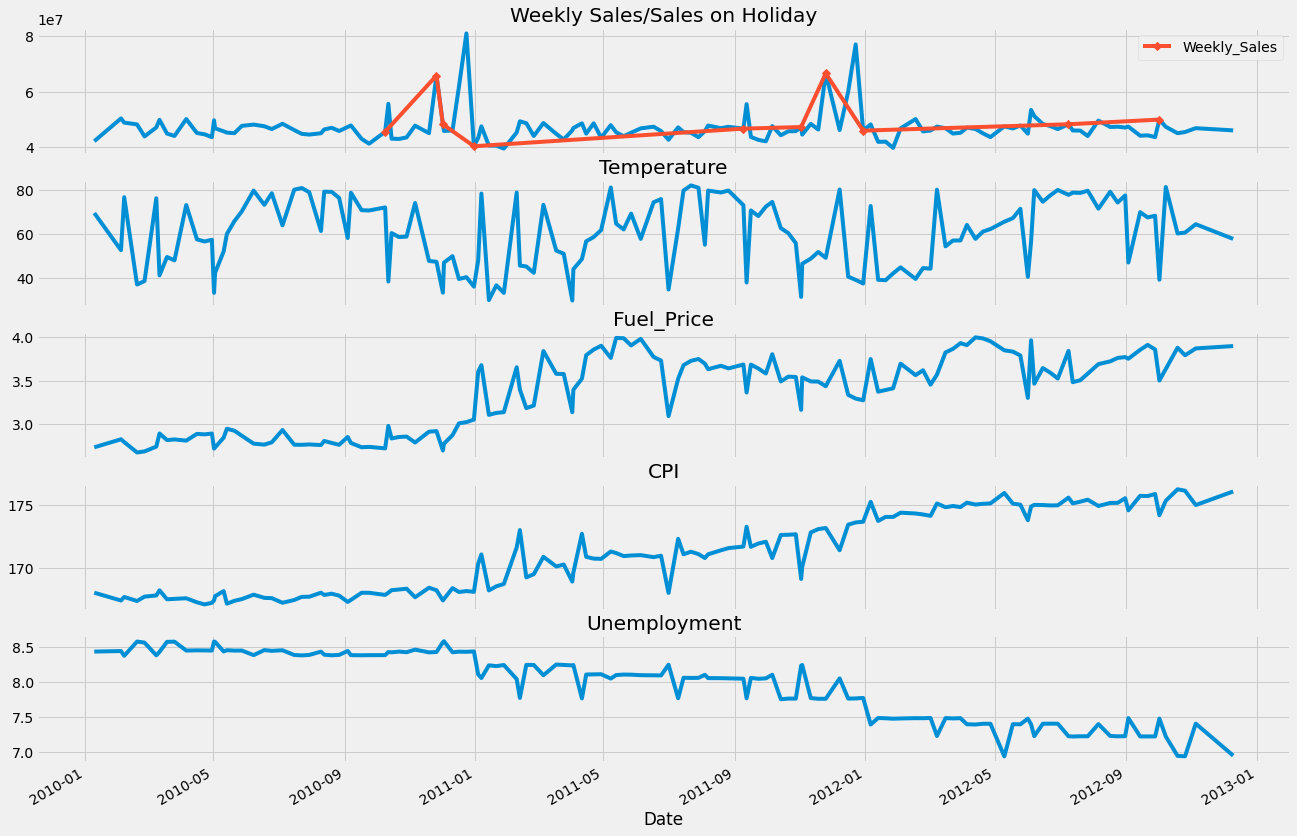

In [24]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(5,1,figsize=(20,15),sharex=True) 
grouped_date["Weekly_Sales"].plot(ax=ax[0],title="Weekly Sales/Sales on Holiday")
grouped_date[grouped_date.IsHoliday_x==True]["Weekly_Sales"].plot(marker="D",ax=ax[0],legend="Holiday Week sale")
grouped_date["Temperature"].plot(ax=ax[1], title="Temperature")
grouped_date["Fuel_Price"].plot(ax=ax[2],title="Fuel_Price")
grouped_date["CPI"].plot(ax=ax[3],title="CPI")
grouped_date["Unemployment"].plot(ax=ax[4],title="Unemployment")

Once again we can see that sales are flat year over year although now we can see there is rising inflation as shown by the increasing fuel prices and the CPI index. The economy also looks to be improving with unemployement decreasing. With the favorable macroeconomic indicators, we would expect our sales to be improving as well.

# Data Manipulation

Let's begin manipulating the data in different ways and analyzing for trends. Let's start by grouping by store level.

In [25]:
store_group = df.groupby('Store').sum()

In [26]:
pd.set_option('float_format', '{:f}'.format)
pd.options.display.float_format = '{:,}'.format

In [27]:
store_sales = store_group['Weekly_Sales'].sort_values(ascending=False).round(decimals=1)

In [28]:
store_sales

Store
20   301,397,792.5
4    299,543,953.4
14   288,999,911.3
13   286,517,703.8
2    275,382,441.0
10   271,617,713.9
27   253,855,916.9
6    223,756,130.6
1    222,402,808.9
39   207,445,542.5
19   206,634,862.1
31   199,613,905.5
23   198,750,617.8
24   194,016,021.3
11   193,962,786.8
28   189,263,680.6
41   181,341,934.9
32   166,819,246.2
18   155,114,734.2
22   147,075,648.6
12   144,287,230.1
26   143,416,393.8
34   138,249,763.0
40   137,870,309.8
35   131,520,672.1
8    129,951,181.1
17   127,782,138.8
45   112,395,341.4
21   108,117,878.9
25   101,061,179.2
43    90,565,435.4
15    89,133,683.9
7     81,598,275.1
42    79,565,752.4
9     77,789,219.0
29    77,141,554.3
16    74,252,425.4
37    74,202,740.3
30    62,716,885.1
3     57,586,735.1
38    55,159,626.4
36    53,412,215.0
5     45,475,688.9
44    43,293,087.8
33    37,160,222.0
Name: Weekly_Sales, dtype: float64

Highest ranking individual store is store 20 which is approaching 10x greater sales than store 33. Let's visualize it.

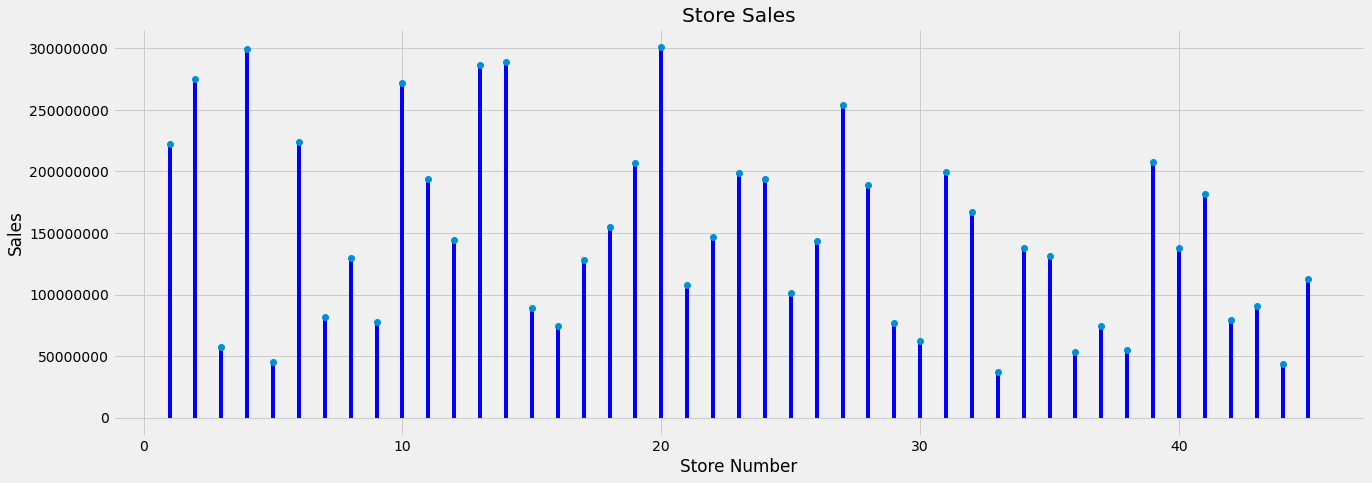

In [29]:
fig1, ax1 = plt.subplots(figsize=(20, 7))
plt.vlines(x=store_group.index, ymin=0, ymax=store_group['Weekly_Sales'], color='blue')
plt.plot(store_group.index,store_group['Weekly_Sales'], "o")
plt.title("Store Sales")
plt.ylabel("Sales")
plt.xlabel("Store Number")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

This chart makes it easier to interpret and see which are are best performing stores. Let's analyze by department level now.

In [30]:
dept_group = df.groupby('Dept').sum()

In [31]:
dept_sales = dept_group['Weekly_Sales'].sort_values(ascending=False).round(decimals=1)

In [32]:
dept_sales

Dept
92.0   483,943,341.9
95.0   449,320,162.5
38.0   393,118,136.9
72.0   305,725,152.2
90.0   291,068,463.7
            ...     
51.0        30,572.8
78.0         1,714.7
39.0           178.0
43.0            14.3
47.0        -4,962.9
Name: Weekly_Sales, Length: 81, dtype: float64

Best performing Dept is Dept 92. The worst performing depts. have hardly any sales with only $14 for Dept 43. Dept 47 somehow has a negative 5k in sales. Maybe a large return from the prior year?

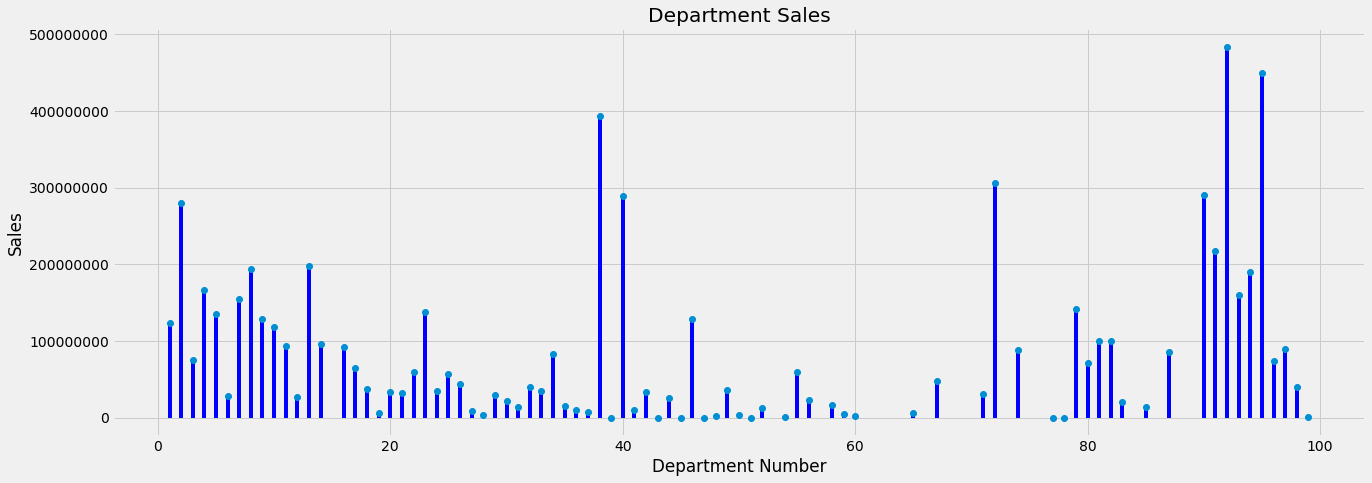

In [33]:
fig1, ax1 = plt.subplots(figsize=(20, 7))
plt.vlines(x=dept_group.index, ymin=0, ymax=dept_group['Weekly_Sales'], color='blue')
plt.plot(dept_group.index,dept_group['Weekly_Sales'], "o")
plt.title("Department Sales")
plt.ylabel("Sales")
plt.xlabel("Department Number")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

Let's generate a pivot table to analyze the Departments in each Store.

In [34]:
combo_group = pd.pivot_table(df, values = ['Weekly_Sales'], index = ['Store'], columns = ['Dept'], aggfunc=np.sum, fill_value=0)
combo_group_sort = combo_group.reindex(combo_group['Weekly_Sales'].sort_values(by = [1], ascending=False).index).round(0)
combo_group_sort

Weekly_Sales                                                   \
Dept          1.0          2.0         3.0         4.0         5.0    
Store                                                                 
13     6,723,925.0 10,916,614.0 3,734,677.0 6,086,548.0 8,120,532.0   
20     5,798,003.0 11,189,929.0 2,215,209.0 7,358,262.0 5,955,633.0   
10     5,709,295.0 15,700,727.0 4,588,324.0 6,946,915.0 8,347,405.0   
4      5,288,131.0 13,390,422.0 2,718,786.0 8,094,286.0 6,530,582.0   
23     4,745,664.0 10,084,729.0 2,847,497.0 3,907,375.0 5,276,109.0   
2      4,401,251.0  9,425,548.0 2,499,149.0 6,521,896.0 4,369,410.0   
14     4,377,485.0 11,111,795.0 2,776,813.0 7,569,894.0 4,785,970.0   
27     4,352,631.0 11,297,150.0 2,892,423.0 6,234,362.0 4,012,442.0   
6      3,413,060.0  7,188,530.0 2,403,349.0 4,888,793.0 4,928,539.0   
41     3,318,352.0  6,914,026.0 2,434,122.0 4,367,016.0 3,648,494.0   
32     3,267,927.0  7,196,260.0 2,212,573.0 4,023,613.0 2,967,017.0   
17     3,260,630.0  6,039,154.0 2,756,891.0 3,426,474.0 3,872,773.0   
1      3,219,405.0  6,592,599.0 1,880,518.0 5,285,874.0 3,468,886.0   
18     3,144,335.0  9,104,115.0 2,344,196.0 3,828,855.0 3,279,556.0   
39     3,135,278.0  9,629,395.0 2,941,467.0 6,407,475.0 3,438,211.0   
19     3,075,076.0  7,270,273.0 2,633,234.0 4,485,273.0 4,112,569.0   
22     3,073,538.0  7,630,745.0 1,880,590.0 4,590,891.0 3,315,789.0   
28     2,885,805.0  8,258,432.0 1,796,398.0 4,001,257.0 4,035,691.0   
25     2,880,863.0  5,272,597.0 1,685,703.0 2,910,258.0 1,776,488.0   
34     2,852,503.0  4,993,020.0 1,197,965.0 2,830,186.0 3,093,648.0   
26     2,774,595.0  3,917,918.0 1,052,108.0 3,503,230.0 2,515,303.0   
11     2,697,110.0  8,167,349.0 2,520,915.0 4,123,797.0 5,242,861.0   
24     2,696,840.0  5,833,995.0 1,691,059.0 4,182,086.0 4,172,462.0   
40     2,687,625.0  3,818,487.0   927,931.0 3,487,305.0 2,529,623.0   
45     2,537,666.0  5,119,530.0 1,359,646.0 3,464,872.0 2,303,310.0   
31     2,482,001.0  8,367,235.0 1,518,185.0 4,983,393.0 2,676,335.0   
12     2,478,203.0 10,652,763.0 2,507,541.0 3,814,352.0 3,969,137.0   
35     2,442,819.0  6,517,719.0 2,046,099.0 2,787,875.0 3,554,756.0   
29     2,217,172.0  3,600,978.0 1,143,422.0 2,048,649.0 1,849,250.0   
21     2,137,857.0  6,832,626.0 2,088,819.0 2,767,726.0 2,300,995.0   
8      2,114,945.0  5,109,365.0 1,527,713.0 3,015,771.0 2,836,955.0   
15     1,979,942.0  3,763,390.0 1,497,326.0 1,870,751.0 2,354,596.0   
9      1,694,058.0  3,570,635.0 1,072,122.0 2,454,731.0 2,757,433.0   
16     1,623,405.0  3,367,528.0 1,091,866.0 2,108,975.0 1,929,719.0   
37     1,576,466.0  2,361,137.0   185,594.0 2,518,804.0   162,681.0   
42     1,483,646.0  2,284,697.0   116,467.0 2,128,593.0   150,478.0   
30     1,399,738.0  1,855,348.0   105,817.0 1,889,902.0    57,996.0   
5      1,397,761.0  1,761,467.0   586,455.0 1,410,095.0   957,986.0   
7      1,364,621.0  3,232,328.0 1,234,596.0 2,137,924.0 1,982,030.0   
44     1,151,149.0  1,340,950.0    81,655.0 1,058,766.0   137,376.0   
43     1,079,523.0  2,963,368.0   142,950.0 2,606,516.0    49,486.0   
3      1,047,993.0  2,408,374.0   787,830.0 1,206,089.0 1,672,437.0   
38       990,066.0  1,571,023.0    71,314.0 1,525,739.0    56,831.0   
33       340,209.0  1,068,414.0    40,605.0   873,389.0    16,007.0   
36       320,210.0  1,918,492.0    54,529.0 1,411,911.0    35,567.0   

                                                                    ...  \
Dept         6.0         7.0          8.0         9.0         10.0  ...   
Store                                                               ...   
13    1,127,816.0 8,565,234.0  5,182,158.0 5,896,812.0 4,208,759.0  ...   
20    1,174,137.0 7,063,442.0 10,931,644.0 5,468,838.0 5,981,185.0  ...   
10    1,509,587.0 8,431,954.0 12,403,798.0 9,214,451.0 6,879,453.0  ...   
4     1,178,574.0 7,254,126.0  9,001,810.0 4,924,515.0 5,329,562.0  ...   
23    1,057,270.0 6,238,242.0  5,249,564.0 7,175,506.0 4,455,189.0  ... 

Let's see whats our best performing Store/Dept Combination

In [35]:
best_group = df.groupby(['Store', 'Dept']).sum().round(1)
best_group[best_group['Weekly_Sales'] == best_group['Weekly_Sales'].max()]

,,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_x,Weekly_Sales,Size
Store,Dept,,,,,,,
14,92.0,"8,264.1",488.7,"26,638.9","1,236.8",10,"26,101,497.7",28728414


Looks like it is Store 14 and Dept 92! Interesting to see all the best performing combinations include Dept 92 and the worst performing ones including Dept 99 as shown in our pivot table above. Dept 99 must be have been recently established.

Let's go in a more micro level and analyze specific stores and department combinations. Let's start with our best combo.

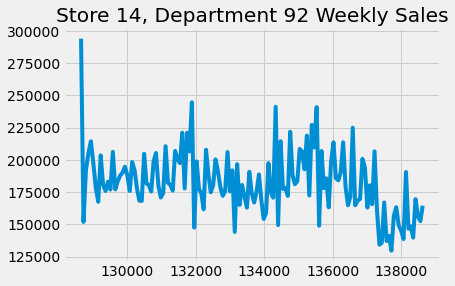

In [36]:
store_14 = df.loc[(df['Store'] == 14) & (df['Dept'] == 92.0)]['Weekly_Sales'].plot(title = 'Store 14, Department 92 Weekly Sales')

We immediately notice an interesting trend. This store/department has extremely consistent sales. There isn't much variance from the holidays to the rest of the year. Guess that factors into it being our best sales combination; its product and location is very non seasonal.

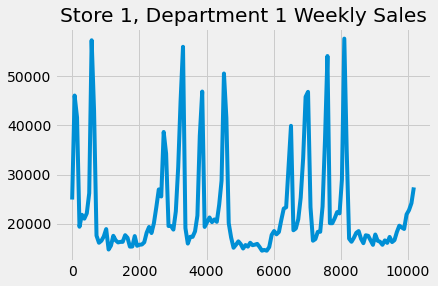

In [37]:
df.loc[(df['Store'] == 1) & (df['Dept'] == 1.0)]['Weekly_Sales'].plot(title = 'Store 1, Department 1 Weekly Sales')
plt.show()

This store/ department combo has very seasonal sales as we saw was the norm in the company aggregate.

Let's take a quick look at what is the best performing store "Type". We were not provided information on what these letters represent.

In [38]:
top_type = df.groupby(by = ['Type'], as_index=False)['Weekly_Sales'].sum()
top_type.sort_values('Weekly_Sales', ascending=False).round(0)

,Type,Weekly_Sales
0,A,"4,331,014,723.0"
1,B,"2,000,700,737.0"
2,C,"405,503,528.0"


Store Type A is the best performing Type by far; performing better than the other two types combined.

# Correlation Analysis

Let's see if there are any correlations between our sales and macroeconomic factors. Let's make a heatmap.

In [39]:
agg_corr = grouped_date.corr()
agg_corr

,Temperature,Fuel_Price,IsHoliday_x,CPI,Unemployment,Size,Weekly_Sales
Temperature,1.0,0.20579352615761012,-0.1893141806078954,0.1523099540938109,-0.1671358610927761,-0.5070938183982592,-0.15860254724476278
Fuel_Price,0.20579352615761012,1.0,-0.08365418194089423,0.8246480470043202,-0.7508920274167431,0.2323511234554915,-0.05637101471192179
IsHoliday_x,-0.1893141806078954,-0.08365418194089423,1.0,-0.025266629621601876,0.04185928791737741,0.2657771648714997,0.17268293616890956
CPI,0.1523099540938109,0.8246480470043202,-0.025266629621601876,1.0,-0.9768845097890599,0.37823350683065887,0.027008174737346624
Unemployment,-0.1671358610927761,-0.7508920274167431,0.04185928791737741,-0.9768845097890599,1.0,-0.31880032203225817,0.0034428767444594343
Size,-0.5070938183982592,0.2323511234554915,0.2657771648714997,0.37823350683065887,-0.31880032203225817,1.0,0.3989306416447245
Weekly_Sales,-0.15860254724476278,-0.05637101471192179,0.17268293616890956,0.027008174737346624,0.0034428767444594343,0.3989306416447245,1.0


In [40]:
agg_corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Temperature,Fuel_Price,IsHoliday_x,CPI,Unemployment,Size,Weekly_Sales
Temperature,1.00,0.21,-0.19,0.15,-0.17,-0.51,-0.16
Fuel_Price,0.21,1.00,-0.08,0.82,-0.75,0.23,-0.06
IsHoliday_x,-0.19,-0.08,1.00,-0.03,0.04,0.27,0.17
CPI,0.15,0.82,-0.03,1.00,-0.98,0.38,0.03
Unemployment,-0.17,-0.75,0.04,-0.98,1.00,-0.32,0.00
Size,-0.51,0.23,0.27,0.38,-0.32,1.00,0.40
Weekly_Sales,-0.16,-0.06,0.17,0.03,0.00,0.40,1.00


As we can see from our heatmap, Weekly Sales does not have a high correlation dependency to any of our independent variables. That rules out being able to use linear regression for our forecasting. There does look to be a slight correlation between Weekly Sales and the Size of the Stores which we can explore later. We do see a high correlation between Fuel Price and CPI which makes sense as they are both inflation indicators as well as a negative correlation between CPI and Unemployment which again makes sense as high unemployment would drive down customer prices.

Let's graph the variables in a scatter plot and see if the linear lines are prominent.

<Figure size 432x288 with 0 Axes>

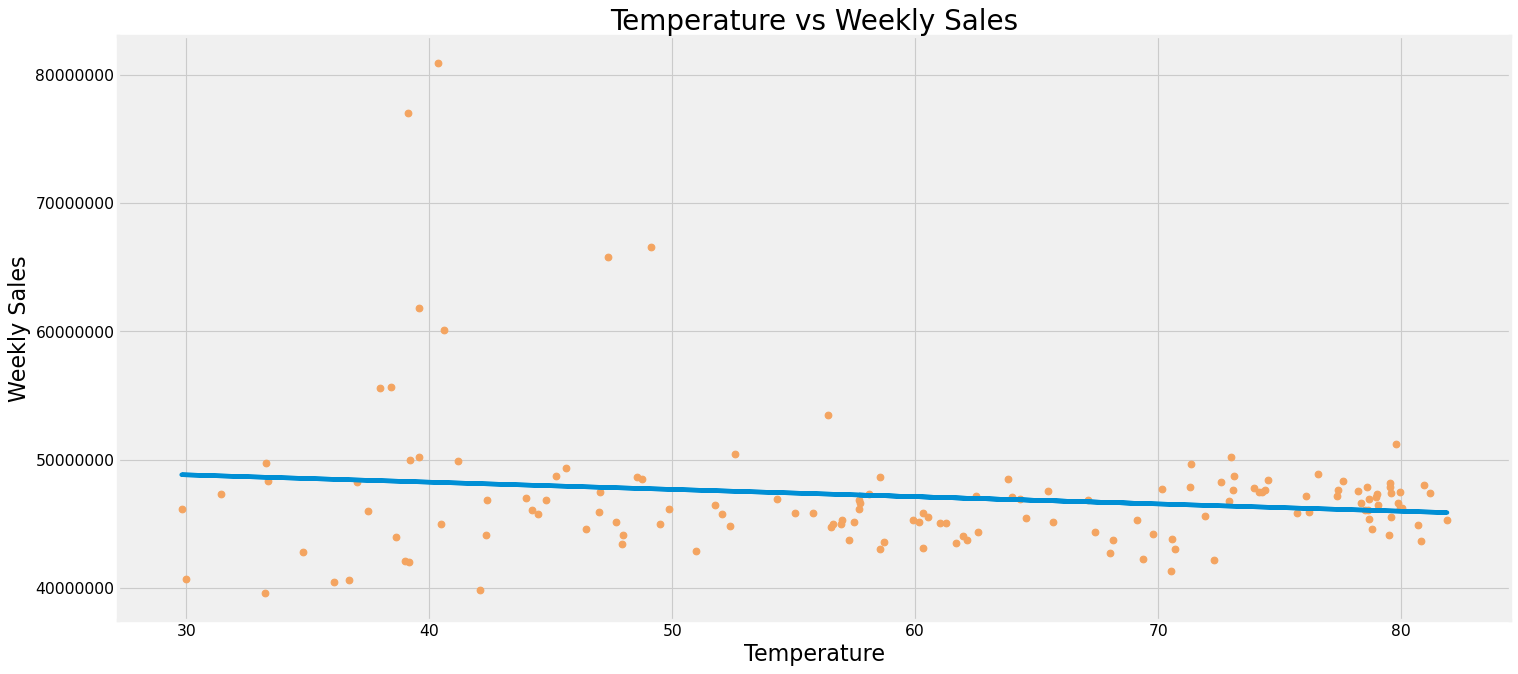

In [41]:
x = grouped_date['Temperature']
y = grouped_date['Weekly_Sales']

fig = plt.figure()
figure(num=None, figsize=(20, 9), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x, y, 'o', color = 'sandybrown')
m,b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, '-')
plt.title(label= 'Temperature vs Weekly Sales', fontsize=25)
plt.xlabel('Temperature', fontsize=20)
plt.ylabel('Weekly Sales', fontsize=20)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

Just as we thought from our correlation matrix. No correlation as the points are all over the graph.

<Figure size 432x288 with 0 Axes>

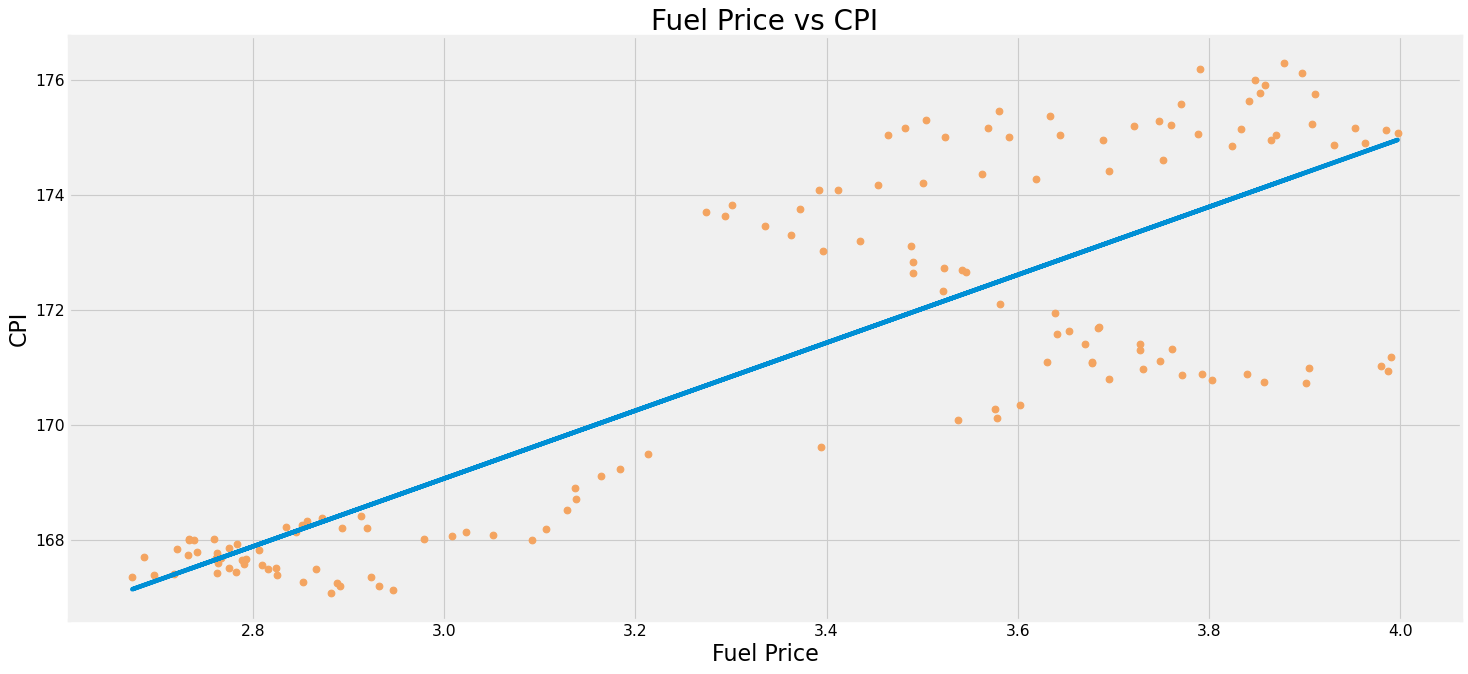

In [42]:
x = grouped_date['Fuel_Price']
y = grouped_date['CPI']


fig = plt.figure()
figure(num=None, figsize=(20, 9), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x, y, 'o', color = 'sandybrown')
m,b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, '-')
plt.title(label= 'Fuel Price vs CPI', fontsize=25)
plt.xlabel('Fuel Price', fontsize=20)
plt.ylabel('CPI', fontsize=20)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

Here we see the linear line going through a lot of the intercepts and with a positive slope showing there is a positive correlation between CPI and Fuel Price.

<Figure size 432x288 with 0 Axes>

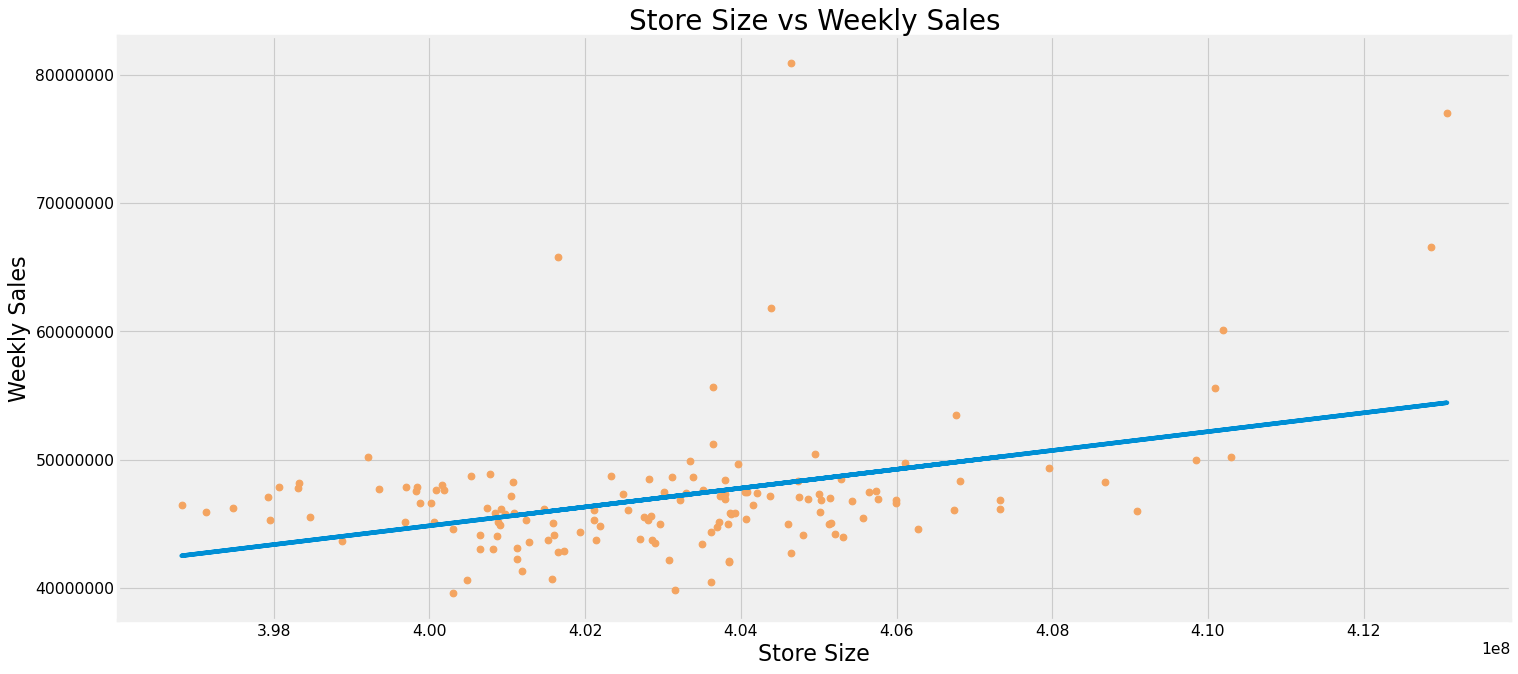

In [43]:
x = grouped_date['Size']
y = grouped_date['Weekly_Sales']

fig = plt.figure()
figure(num=None, figsize=(20, 9), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x, y, 'o', color = 'sandybrown')
m,b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, '-')
plt.title(label= 'Store Size vs Weekly Sales', fontsize=25)
plt.xlabel('Store Size', fontsize=20)
plt.ylabel('Weekly Sales', fontsize=20)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

Final one, we can see there is a slight correlation between the Store Size and Sales. Not much to work with though.

# Sales Time-Series Forecasting

Let's utilize a Holt's Winters model from the statsmodels library as Holt's Winters is useful for highly seasonal forecasts as we saw is the case for our retail data with large fluctuations during the holidays. Let's start by breaking out data set into sets utilized for training and testing.

In [44]:
grouped_date_index=df.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()

In [45]:
train_df = grouped_date_index['Weekly_Sales'].iloc[:52]
test_df = grouped_date_index['Weekly_Sales'].iloc[52:105]

Let's quickly plot our training and test data sets to see how they look like before we implement our model.

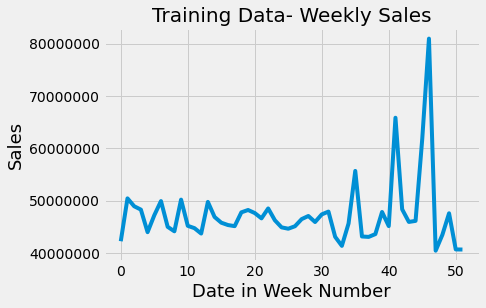

In [46]:
train_df.plot()
plt.xlabel('Date in Week Number', size = 18)
plt.ylabel('Sales', size = 18)
plt.title('Training Data- Weekly Sales', size = 20)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

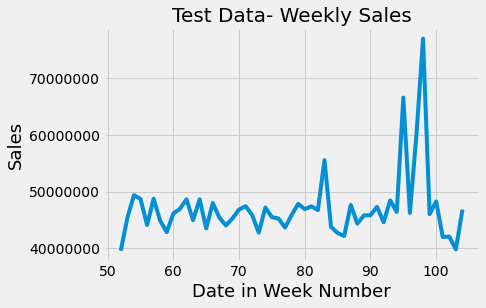

In [47]:
test_df.plot()
plt.xlabel('Date in Week Number', size = 18)
plt.ylabel('Sales', size = 18)
plt.title('Test Data- Weekly Sales', size = 20)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

Looks good to me. With our data now allocated to training and test data, let's utilize these sets and train our model and compare it to the test data. Let's create a graph that plots all three data sets for easy visualization.

c:\users\desmo\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


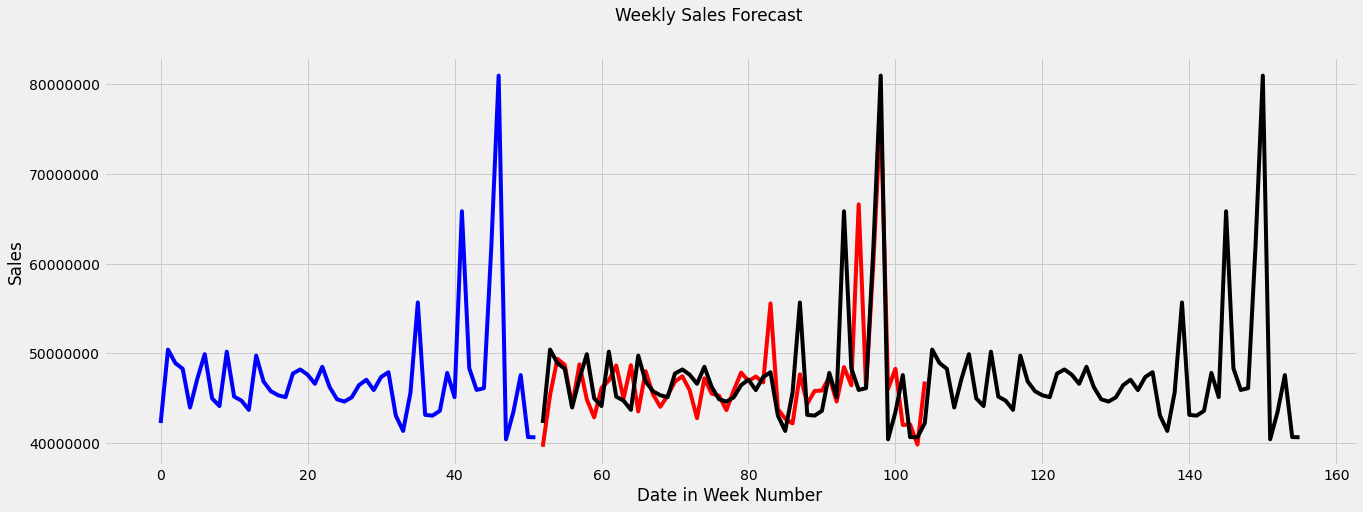

In [48]:
model = ExponentialSmoothing(train_df, seasonal='mul', seasonal_periods=52).fit()
prediction = model.forecast(104)
prediction

fig = plt.figure()
fig.suptitle('Weekly Sales Forecast')
train = train_df.plot(color='blue', figsize=(20,7), label= 'Sales History')
test = test_df.plot(color='red', figsize=(20,7), label= 'Actual History')
forecast = prediction.plot(color='black',figsize=(20,7), label= 'Sales Forecast')
plt.xlabel('Date in Week Number')
plt.ylabel('Sales')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

We can see our training data in blue, test data in red, and our forecast is in black. We can see the forecast being consistently accurate compared to the test data. Looking at the forecast that's stretching past our test data, we see the seasonal jump as we would expect from it being the holidays again. Let's see the statistics and see how accurate our forecast is.

## Statistical Summary

In [49]:
print(model.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:             Weekly_Sales   No. Observations:                   52
Model:             ExponentialSmoothing   SSE                              0.161
Optimized:                         True   AIC                           -192.455
Trend:                             None   BIC                            -87.088
Seasonal:                Multiplicative   AICC                               inf
Seasonal Periods:                    52   Date:                 Mon, 07 Jun 2021
Box-Cox:                          False   Time:                         22:20:49
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0050000                alpha                 True
smoothing_seasonal       

In [50]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print("Mean Absolute Percentage Error = {a}%".format(a=mean_absolute_percentage_error(test_df,prediction)))

Mean Absolute Percentage Error = 5.875128027740558%


Out model is showing high accuracy shown by the MAPE statistic being slightly below 6% implying that on average, the forecast's distance from the actual value is about 6%.

## Conclusion

### Takeaway Points:

As we saw, our sales data was very seasonal and although there were large fluctuations around the holidays, the year over year trend was flat. We concluded on our best performing stores and departments and analyzed for correlations between our sales and macroeconomic indicators which we unfortunately didn't find a strong correlation between. We finally were able to build a model that took account of the high seasonality of our sales and was able to accurately forecast our future sales. The forecast will be useful for inventory management and ensuring our business has adequate cash flow among other important business decisions.

Thank you for taking the time to take a look through my analysis. It was a worthwhile project to undertake that allowed me to continue developing and applying my Python and data science skills.

## Citations

Below are the Kaggle Notebooks I referred to for inspiration on additonal techniques after completing my initial analysis:

https://www.kaggle.com/aremoto/retail-sales-forecast
https://www.kaggle.com/shubhamsinghgharsele/retail-data-analysis
